# Pandas

- 수식으로 계산할 수 있고 시각화도 할 수 있는 데이터 분석도구입니다.
- 엑셀로도 데이터를 분석할 수 있는데 왜 판다스를 사용하는 것일까요?
- 엑셀로는 힘든 대용량의 데이터를 판다스는 분석할 수 있기 때문입니다.

아래에 첨부된 10 minutes to pandas를 한 번씩 실행해보시면 판다스의 전반적인 것을 익힐 수 있습니다.


추가로 같이 첨부된 Pandas Cheat Sheet도 추천드립니다.

1.판다스 라이브러리 공식 사이트
-  https://pandas.pydata.org/

2.10 minutes to pandas
- https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html
- https://dataitgirls2.github.io/10minutes2pandas/

3.Pandas Cheat Sheet
- http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## DataFrame

In [1]:
import pandas as pd

In [3]:
# Cheet Sheet에 있는 DataFrame을 가져와서 따라해 보도록 하겠습니다.
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## Series

In [4]:
# df["a"]라고 컬럼을 출력하게 되면 a 컬럼에 있는 4,5,6의 값이 출력이 되는데 이것을 Series 데이터라고 부릅니다.
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [5]:
#하지만 대괄호를 하나 더 쓰게 된다면 DataFrame 형태로 출력되는 것을 볼 수 있습니다.
df[["a"]]

,a
1,4
2,5
3,6


##### *결과를 보시면 이렇듯 DataFrame은 2차원의 구조를 가지고 있고, Series는 1차원의 구조를 가지고 있는 것을 알 수 있습니다.

## Subset (일부 값만 불러오기)

In [12]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [17]:
# Rows 기준 예시
df[df["c"] > 7]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [19]:
# df["a", "b"]:두 개 이상의 값을 불러올 때 Series형태로 불러올 경우 키값 오류가 발생합니다.
    
# DataFrame 형태로 불러와야 합니다.
df[["a","b"]]

,a,b
1,4,7
2,5,8
3,6,9


In [21]:
df[df["b"]> 7]

,a,b,c
2,5,8,11
3,6,9,12


## Summarize Data

Categorical한 값의 빈도수를 구하는 방법입니다.

In [22]:
df["a"].value_counts()

6    1
5    1
4    1
Name: a, dtype: int64

## Reshaping

sort_values, drop

#### 1) "a"컬럼을 기준으로 정렬하기

In [23]:
df["a"].sort_values()

1    4
2    5
3    6
Name: a, dtype: int64

#### 2) DataFrame 전체에서 "a"값을 기준으로 정렬하기

In [24]:
df.sort_values("a")

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


#### 3) 역순으로 정렬하기

In [25]:
df.sort_values("a", ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


#### 4) "c"컬럼 drop 하기

In [26]:
df = df.drop(["c"], axis=1)
df

,a,b
1,4,7
2,5,8
3,6,9


## Group Data


Groupby, pivot_table

#### 1) "a" 컬럼값을 Groupby하여 "b"의 컬럼값 평균값 구하기 

In [27]:
df.groupby(["a"])["b"].mean()

a
4    7
5    8
6    9
Name: b, dtype: int64

#### 2) pivot_table로 평균값 구하기

In [28]:
pd.pivot_table(df, index="a")

,b
a,
4,7
5,8
6,9


## Plotting

데이터를 가지고 다양한 시각화를 해보실 수 있습니다.

#### 1) 꺾은선 그래프 그리기

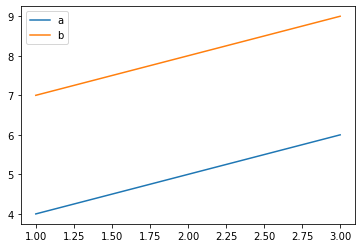

In [29]:
df.plot()

In [30]:
df

,a,b
1,4,7
2,5,8
3,6,9


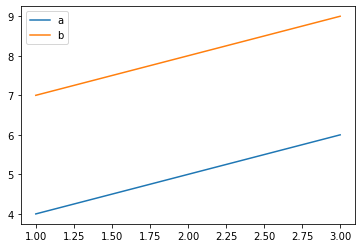

In [31]:
df.plot()

#### 2) 막대그래프 그리기

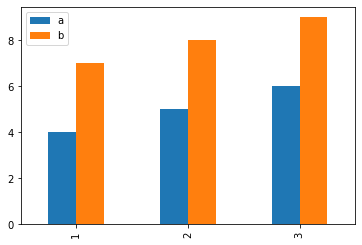

In [33]:
df.plot.bar()

#### 3) 밀도함수 그리기

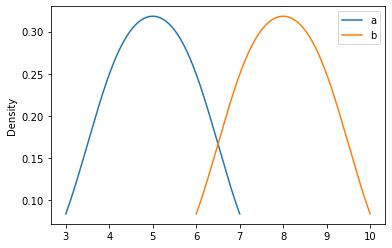

In [32]:
df.plot.density()

# 파일 경로 설정 방법

데이터 파일의 경로를 설정하는 방법을 학습한다.

#### 1)공공데이터포털(도로교통공단_교통사고 정보)로 들어가셔서 데이터를 다운로드
- 공공데이터 포털: https://www.data.go.kr/index.do
- https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=TOTAL&keyword=%EB%8F%84%EB%A1%9C%EA%B5%90%ED%86%B5%EA%B3%B5%EB%8B%A8_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0+%EC%A0%95%EB%B3%B4&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=

#### 2)다운받은 파일을 주피터 노트북에서 작업하고 있는 폴더로 가져오기

#### 3)판다스로 csv파일 불러오기
- csv파일을 불러올 때 한글파일 인코딩을 하지 않으면 오류가 나기 때문에 encoding="cp949"를 함께 적어주셔야 합니다.
- "euc-kr"을 적는 방법도 있지만 일부 한글은 깨지기 때문에 "cp949"를 사용하시는 것을 추천드립니다.

In [8]:
import pandas as pd

In [9]:
#파일 저장 위치는 개별마다 다를 수 있으니 유의하시기 바랍니다.
pd.read_csv("c://Users/13ZD970/도로교통공단_사망 교통사고 정보_20201123.csv", encoding="cp949")

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019-01-01 00,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019-01-01 03,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019-01-01 16,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019-01-01 19,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019-01-01 21,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019-12-31 05,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019-12-31 08,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019-12-31 12,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019-12-31 12,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [10]:
# 주피터 노트북이 있는 폴더의 경로를 출력하는 방법
%pwd

'C:\\Users\\13ZD970'